### Step0. Import Necessary Libraries

In [2]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install seaborn==0.13.2

  Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.0 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.2.0 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.0 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.0 which is incompatible.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.


import the necessary libraries for data processing, model training, and evaluation.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Step1. Load the dataset and understant the categories of data

In [46]:
file_path = r"C:\Users\Stella Huang\Desktop\UGA\Planned Health\01_Gen&Chem\12_discussion_05Jun2025\dataset_test.csv"
data = pd.read_csv(file_path)
data.head()

,Cohort,Arm,MSKCC,Sarc,Rhab,Number_of_Prior_Therapies,Tumor_Sample_Primary_or_Metastasis,Sex,Age,ORR,...,UBA5,UBA52,UBA52P9,UCHL1,UCHL1.DT,UCP2,VEGFA,ZDHHC20P3,ZDHHC7,ZNF433
0,CM-025,NIVOLUMAB,FAVORABLE,0,0,1,METASTASIS,M,69.0,SD,...,34.12708,37.72089,20.97768,33.51904,20.95017,35.08916,37.12501,20.95143,34.26101,32.57309
1,CM-025,EVEROLIMUS,FAVORABLE,0,0,1,METASTASIS,M,61.0,SD,...,34.51873,38.45319,20.97768,30.55278,20.95017,34.37333,37.90405,20.95143,34.75033,29.95693
2,CM-025,EVEROLIMUS,FAVORABLE,0,0,2,PRIMARY,M,61.0,CRPR,...,33.93403,38.24140,20.97768,35.59001,20.95017,34.55823,38.00575,20.95143,33.93191,31.48046
3,CM-025,NIVOLUMAB,INTERMEDIATE,0,0,1,PRIMARY,M,61.0,PD,...,34.28159,38.68207,20.97768,33.70539,24.64941,35.16243,38.85681,23.38186,34.93732,33.32286
4,CM-025,NIVOLUMAB,INTERMEDIATE,0,0,1,PRIMARY,M,59.0,SD,...,35.16719,39.71092,20.97768,30.91825,20.95017,33.60995,40.34498,20.95143,33.99614,32.66356


I would like to know the categories for each variable (object)

In [47]:
print(set(data['Arm']))
print(set(data['MSKCC']))
print(set(data['Tumor_Sample_Primary_or_Metastasis']))
print(set(data['ORR']))
print(set(data['Benefit']))
print(set(data['ExtremeResponder']))

{'EVEROLIMUS', 'NIVOLUMAB'}
{'INTERMEDIATE', 'FAVORABLE', 'POOR'}
{nan, 'PRIMARY', 'METASTASIS'}
{'CRPR', 'SD', 'CR', 'NE', 'PD', 'PR'}
{'ICB', 'NCB', 'CB'}
{'NEITHER', 'ER', 'PD'}


Check for null values, and display a summary of the dataset

In [48]:
# Checking for null values
# print(data.isnull().sum())
## data.isnull(): check if there is any NaN in data
## .sum(): sumerize the number of TRUE (if TRUE means NaN), calculate how many NaN in the column

# Dataset summary
print(data.info())
## .info(): showing tyoe and non-null amount
#print(data.describe())
## .describe():statistic info: count, mean, std, min, 25%, 50%, 75%, max

print(data.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Columns: 167 entries, Cohort to ZNF433
dtypes: float64(154), int64(5), object(8)
memory usage: 373.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 167 columns):
 #    Column                              Non-Null Count  Dtype  
---   ------                              --------------  -----  
 0    Cohort                              286 non-null    object 
 1    Arm                                 286 non-null    object 
 2    MSKCC                               286 non-null    object 
 3    Sarc                                286 non-null    int64  
 4    Rhab                                286 non-null    int64  
 5    Number_of_Prior_Therapies           286 non-null    int64  
 6    Tumor_Sample_Primary_or_Metastasis  284 non-null    object 
 7    Sex                                 286 non-null    object 
 8    Age                                 286 non-nu

### Step2. Data pre-processing

Remove outcome-related features to prevent data leakage

In [49]:
leakage_cols = ['Cohort', 'Benefit', 'ExtremeResponder', 'OS', 'OS_CNSR', 'PFS', 'PFS_CNSR']
data = data.drop(columns=leakage_cols)  # Added: drop columns that cause data leakage

Drop gene columns

In [50]:

gene_cols = ["ACAP1","ACCS","ACCSL","ADCY5","AHRR","AK3P4","ARHGAP42","ARPC1B","ATP6V1G1P2","ATXN3L","BARX2","BICD1","BICD1P1","BMAL2.AS1","BPY2B","BTBD10","BTBD10P1","C3orf20","CACNA1A","CACNG2","CAP1","CAP1P2","CAPN15","CCDC146","CCDC30","CCT7","CCT7P1","CCT7P2","CDS1","CEACAM6","CHST4","CLDN6","CLSPN","CNR1","COPS6","CPPED1","CRPP1","CUL9","CYSRT1","DCAF1","DCAF10","DCAF11","DCAF12","DCAF12L1","DCAF12L2","DCAF13","DCAF13P1","DCAF15","DCAF16","DCAF17","DDHD1.DT","DLGAP5","DOC2A","DPH5","DPH5.DT","DPP4","DPP9","DPP9.AS1","DSPP","ENAHP1","ENAM","EPHB2","EXO1","FALEC","FAM13A","FAM13A.AS1","FAM170A","FAM174A","FAM174A.DT","FAM187B2P","FAUP3","FLT3","FLT3LG","FOCAD.AS1","FTHL17","GADD45A","GAGE2C","GAGE2E","GAGE4","GCOM1","GIT2","GOT2","GOT2P1","GOT2P3","GPR42","GTF2IRD1","HECTD2","HFM1","HILPDA","HLA.DRB1","HLA.G","KRBA2","KRTAP2.3","L1CAM","LINC00994","LINC01307","LINC01396","LOC107984203","LRRC3","LRRC30","LRRC31","LRRC32","LRRC34","LRRC36","LRRC37A","LRRC37A13P","LRRC37A14P","LRRC37A15P","LRRC37A17P","LRRC37A2","LRRC37A3","LRRC37A6P","LRRC37B","LRRC38","LRRC39","LRRC3B","LRRC3C","MASP1","MATCAP1","MIMT1","MIR572","MOAP1","MYOC","MYOCD","NECAP1","NECAP1P2","PLIN2","PSMC1P10","RAB3B","REXO1","RN7SL454P","RN7SL638P","RNU4.30P","RNU4.32P","RPL6P5","S100A6","SIMC1","SLC25A39","SUCNR1","TENM3","TSSK3","UBA5","UBA52","UBA52P9","UCHL1","UCHL1.DT","UCP2","VEGFA","ZDHHC20P3","ZDHHC7","ZNF433"]
data = data.drop(columns=gene_cols)

See the Distribution of ORR

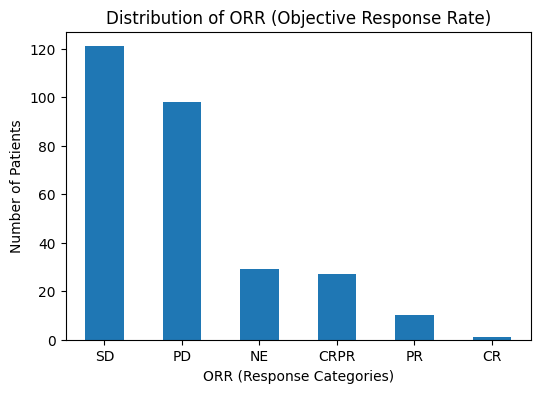

ORR
SD      121
PD       98
NE       29
CRPR     27
PR       10
CR        1
Name: count, dtype: int64

In [51]:
orr_counts = data["ORR"].value_counts()
plt.figure(figsize=(6,4))
orr_counts.plot(kind="bar")
plt.xlabel("ORR (Response Categories)")
plt.ylabel("Number of Patients")
plt.title("Distribution of ORR (Objective Response Rate)")
plt.xticks(rotation=0)
plt.show()
orr_counts

Transfer ORR to binary classification:
<br> Responder (1): "CRPR", "CR","PR"
<br> NON-Responder (0): "PD", "SD"
<br> Remove "NE" (non-evaluate)

In [52]:
# transfer ORR to binary classification
data = data[data["ORR"] != "NE"]  # remove "NE", !=(not equal)
data["ORR_binary"] = data["ORR"].apply(lambda x: 1 if x in ["CRPR", "CR","PR"] else 0)
## data["ORR_binary"] : create a new column "ORR_binary" for saving the binary result
## .apply(...) : apply a function, which will let all value in ORR to transfer, and the function is lambda
## lambda x: it is an anonymous function, x means every value in ORR
### if x in ["CRPR", "CR"] : check if x belongs to ["CRPR", "CR"], if TRUE then 1(Responder), else 0(Non-Responder)

# check the result
data["ORR_binary"].value_counts()
## .value_counts(): count how many times of 1 and 0 in "ORR_binary"


ORR_binary
0    219
1     38
Name: count, dtype: int64

Because some data ("Tumor_Sample_Primary_or_Metastasis", "Sex") is object, I used One-Hot Encoding to transfer object to int.

In [53]:
# Apply One-Hot Encoding to categorical variables
data = pd.get_dummies(data, columns=["Arm", "Tumor_Sample_Primary_or_Metastasis", "Sex", 
                                 ], drop_first=True)

# Check the new dataset structure
print(data.head())


          MSKCC  Sarc  Rhab  Number_of_Prior_Therapies   Age   ORR  \
0     FAVORABLE     0     0                          1  69.0    SD   
1     FAVORABLE     0     0                          1  61.0    SD   
2     FAVORABLE     0     0                          2  61.0  CRPR   
3  INTERMEDIATE     0     0                          1  61.0    PD   
4  INTERMEDIATE     0     0                          1  59.0    SD   

   ORR_binary  Arm_NIVOLUMAB  Tumor_Sample_Primary_or_Metastasis_PRIMARY  \
0           0           True                                       False   
1           0          False                                       False   
2           1          False                                        True   
3           0           True                                        True   
4           0           True                                        True   

   Sex_M  
0   True  
1   True  
2   True  
3   True  
4   True  


And 'MSKCC' is sequential, I define them as FAVORABLE = 2, INTERMEDIATE = 1, POOR = 0<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html

In [54]:
mskcc_map = {
    'POOR': 0,
    'INTERMEDIATE': 1,
    'FAVORABLE': 2
}

data['MSKCC_num'] = data['MSKCC'].map(mskcc_map)

### Step3. First time build the Decision Tree model

I found data is imbalance, so I used Class-weighted here in Decision Tree Classifier.

In [55]:

# 1. Split the dataset into training and testing sets
X = data.drop(columns=["ORR", "ORR_binary", "MSKCC"])  
# Remove target variables ("ORR", "ORR_binary"),  and "MSKCC"
y = data["ORR_binary"]  # Define target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)
## 20% for test, 80% for train
### random_state=42:  is used to set a fixed random seed, 
# ### ensuring that the results remain consistent across different runs of the code.


# 2. Create a Decision Tree model (use class_weight="balanced" to handle class imbalance)
model = DecisionTreeClassifier(class_weight="balanced", 
                                random_state=42)
## class_weight="balanced": allow Decision Tree to adjust data balance automatically
### if without this setting, the model may only learn 0, and ignore 1

# 3. Train the model
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)
## use X_test to predict y
## y_pred contains 0 and 1
### model.predict() creates an array, there are 0 or 1
### The length of y_pred is equal to the number of samples in X_test, 
# ### representing the modeil's predicted values for each test sample.

# 5. Evaluate the model (using Accuracy, Precision, Recall, and F1-score)
print("Accuracy of test set:", accuracy_score(y_test, y_pred))
print("Precision of test set:", precision_score(y_test, y_pred))
print("Recall of test set:", recall_score(y_test, y_pred))
print("F1-score of test set:", f1_score(y_test, y_pred))


Accuracy of test set: 0.7692307692307693
Precision of test set: 0.16666666666666666
Recall of test set: 0.125
F1-score of test set: 0.14285714285714285


In [56]:
y_pred_train = model.predict(X_train)
# 5. Evaluate the model (using Accuracy, Precision, Recall, and F1-score)
print("Accuracy of train set:", accuracy_score(y_train, y_pred_train))
print("Precision of train set:", precision_score(y_train, y_pred_train))
print("Recall of train set:", recall_score(y_train, y_pred_train))
print("F1-score of train set:", f1_score(y_train, y_pred_train))

Accuracy of train set: 1.0
Precision of train set: 1.0
Recall of train set: 1.0
F1-score of train set: 1.0


Cross-validation for train set

In [57]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision')
recall_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

print("Train CV Accuracy:  {:.3f} ± {:.3f}".format(accuracy_scores.mean(), accuracy_scores.std()))
print("Train CV Precision: {:.3f} ± {:.3f}".format(precision_scores.mean(), precision_scores.std()))
print("Train CV Recall:    {:.3f} ± {:.3f}".format(recall_scores.mean(), recall_scores.std()))
print("Train CV F1 Score:  {:.3f} ± {:.3f}".format(f1_scores.mean(), f1_scores.std()))


Train CV Accuracy:  0.795 ± 0.040
Train CV Precision: 0.330 ± 0.116
Train CV Recall:    0.333 ± 0.105
Train CV F1 Score:  0.323 ± 0.089


In [58]:

print("Decision Tree depth:", model.get_depth())
print("Number of leaves:", model.get_n_leaves())

Decision Tree depth: 14
Number of leaves: 62


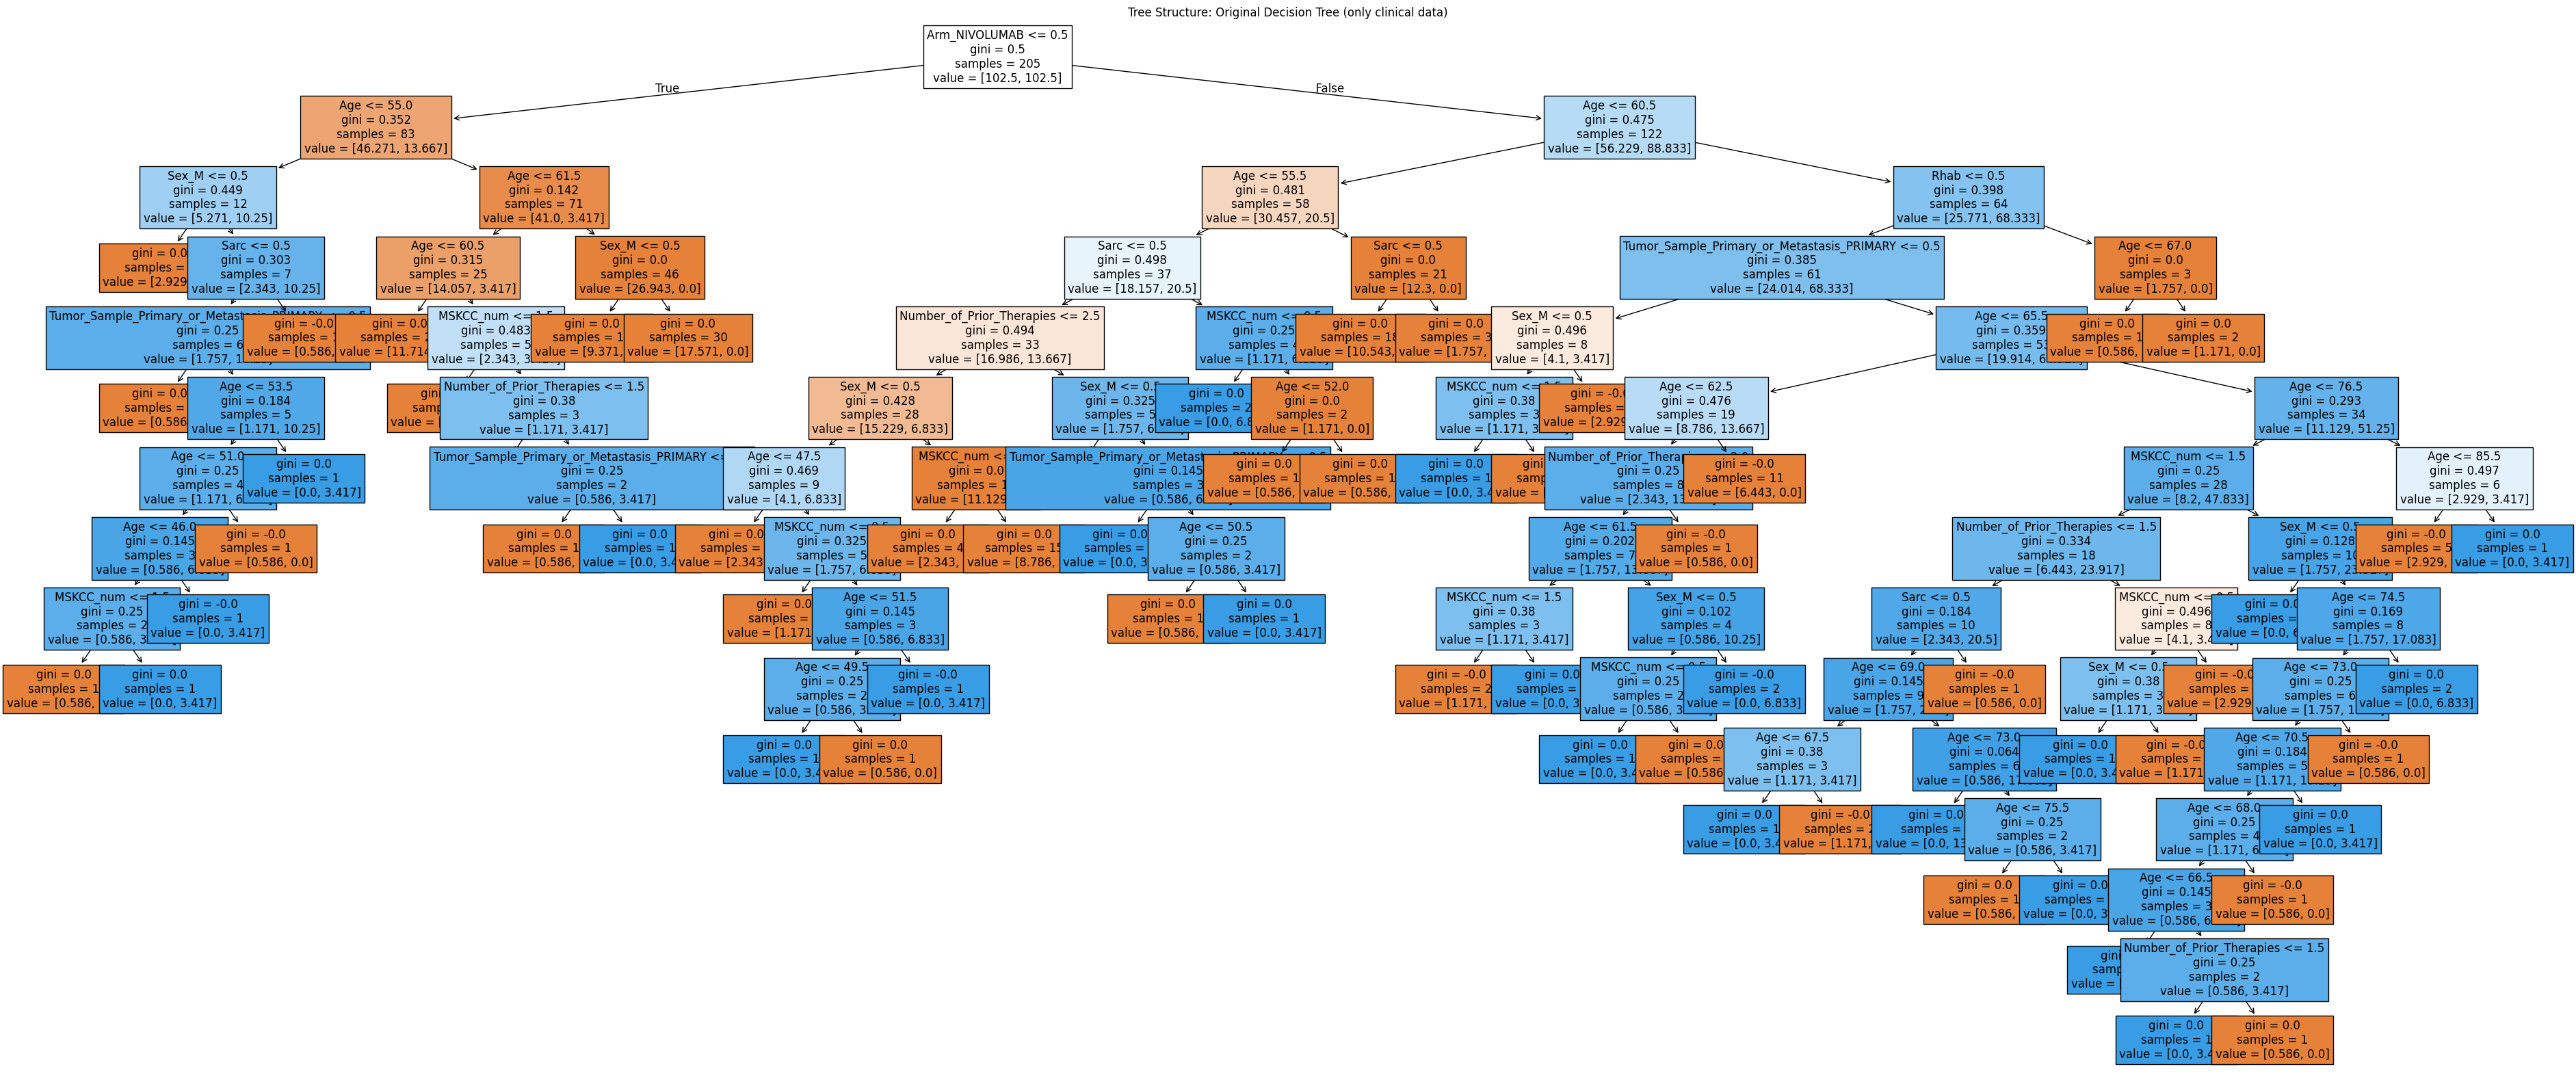

In [59]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(48, 20))  
plot_tree(model, feature_names=X.columns, filled=True, fontsize=12)
plt.title("Tree Structure: Original Decision Tree (only clinical data)")
plt.show()



Just want to make sure the value = [0,1] (Non-responder, Responder)

In [60]:
print(model.classes_)

[0 1]


In [61]:
# Predict on the test set
# The probability that the model predicts the positive class (responder)
y_pred = model.predict(X_test)


In [62]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[39  5]
 [ 7  1]]


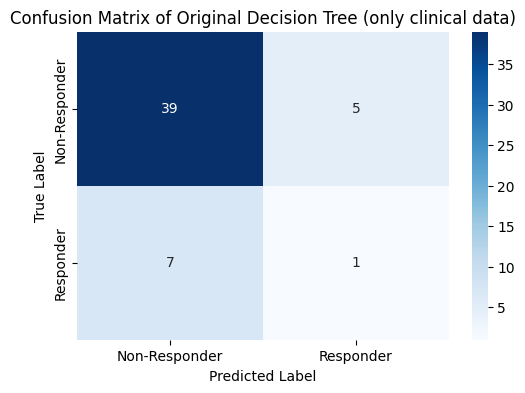

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Responder", "Responder"], yticklabels=["Non-Responder", "Responder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Original Decision Tree (only clinical data)")
plt.show()

Cross-validation of confusion matrix

In [63]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_cv_pred = cross_val_predict(model, X_train, y_train, cv=5)


cm_cv = confusion_matrix(y_train, y_train_cv_pred)
print("Cross-Validated Confusion Matrix (on training set):\n", cm_cv)


Cross-Validated Confusion Matrix (on training set):
 [[153  22]
 [ 24   6]]


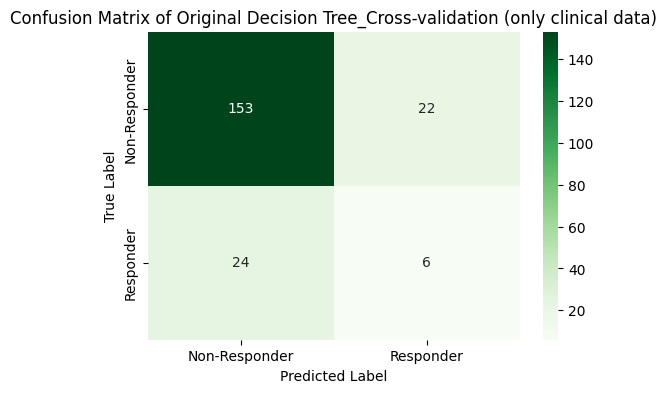

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cv, annot=True, fmt="d", cmap="Greens", 
            xticklabels=["Non-Responder", "Responder"], 
            yticklabels=["Non-Responder", "Responder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Original Decision Tree_Cross-validation (only clinical data)")
plt.show()

Extract feature importances from the model

In [64]:
# Extract feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(20))  # Display top 10 important features

                                      Feature  Importance
3                                         Age    0.460635
6                                       Sex_M    0.127766
7                                   MSKCC_num    0.124864
4                               Arm_NIVOLUMAB    0.122266
2                   Number_of_Prior_Therapies    0.075775
0                                        Sarc    0.037984
5  Tumor_Sample_Primary_or_Metastasis_PRIMARY    0.032288
1                                        Rhab    0.018422


Drawing learning curve

In [65]:
from sklearn.model_selection import learning_curve, StratifiedKFold

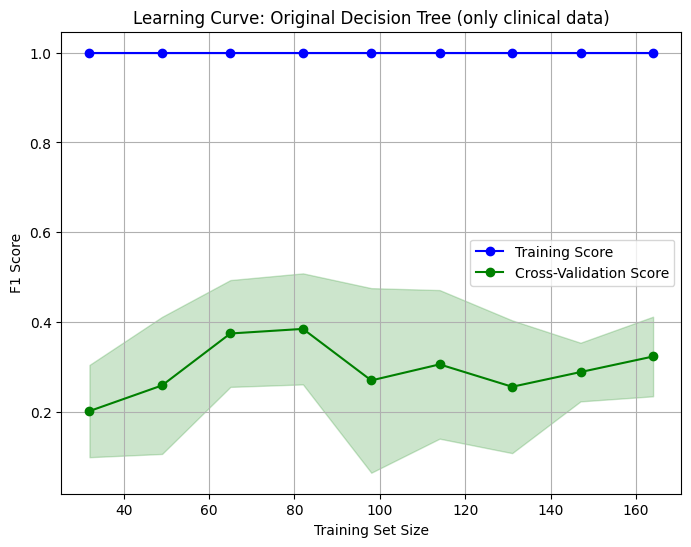

In [66]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the range of training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=cv, scoring='f1', train_sizes=train_sizes, n_jobs=-1
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", color="green", marker="o")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="green")
plt.title("Learning Curve: Original Decision Tree (only clinical data)")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [68]:
from sklearn.model_selection import cross_val_score

# Training score
training_score = model.score(X_train, y_train)
print("Training Score:", training_score)

# Cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Training Score: 1.0
Cross-Validation Scores: [0.36363636 0.16666667 0.28571429 0.4        0.4       ]
Mean Cross-Validation Score: 0.3232034632034632


### Step4. Second time build the Decision Tree model & Reducing complexity of the tree

#### Reducing complexity of the tree by setting for the max_depth, min_samples_split, min_samples_leaf and max_features.

Use GridSearchCV to find the best parameter. And this method is using Cross-Validation + GridSearch.

In [69]:
from sklearn.model_selection import GridSearchCV

I want to try these combination.

In [70]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 13],          # How deep the tree can go
    'min_samples_split': [2, 5, 10],           # How many samples to split
    'min_samples_leaf': [5, 7, 9],             # How many samples in leaf node
    'max_features': [5, 7, 9, 13]     # How many features to consider when looking for the best split
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),  # I use Decision Tree as the model
    param_grid,                                # The parameters I want to tune
    cv=5,                                      # 5-fold cross-validation
    scoring='balanced_accuracy',               # Use balanced accuracy as the scoring metric
    n_jobs=-1                                  # Use all available cores for parallel processing
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("Best Estimator Tree Depth:", grid_search.best_estimator_.get_depth())
print("Best Estimator Num Leaves:", grid_search.best_estimator_.get_n_leaves())



Best parameters found: {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.5961904761904762
Best Estimator Tree Depth: 5
Best Estimator Num Leaves: 16


#### I tried the best parameters (above) in the second train first

##### 1st reducing complexity

max_depth=5, <br>
min_samples_split=2, <br>
min_samples_leaf=5, <br>
max_features=5

In [73]:

# 1. Split the dataset into training and testing sets
X = data.drop(columns=["ORR", "ORR_binary", "MSKCC"])  
# Remove target variables ("ORR", "ORR_binary"),  and "MSKCC"
y = data["ORR_binary"]  # Define target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)
## 20% for test, 80% for train
### random_state=42:  is used to set a fixed random seed, 
# ### ensuring that the results remain consistent across different runs of the code.


# 2. Create a Decision Tree model (use class_weight="balanced" to handle class imbalance)
model = DecisionTreeClassifier(class_weight="balanced",
                                max_depth=5,
                                min_samples_split=2,
                                min_samples_leaf=5, 
                                max_features=5,                   
                                random_state=42)
## class_weight="balanced": allow Decision Tree to adjust data balance automatically
### if without this setting, the model may only learn 0, and ignore 1

# 3. Train the model
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)
## use X_test to predict y
## y_pred contains 0 and 1
### model.predict() creates an array, there are 0 or 1
### The length of y_pred is equal to the number of samples in X_test, 
# ### representing the modeil's predicted values for each test sample.

# 5. Evaluate the model (using Accuracy, Precision, Recall, and F1-score)
print("Accuracy of test set:", accuracy_score(y_test, y_pred))
print("Precision of test set:", precision_score(y_test, y_pred))
print("Recall of test set:", recall_score(y_test, y_pred))
print("F1-score of test set:", f1_score(y_test, y_pred))


Accuracy of test set: 0.6538461538461539
Precision of test set: 0.1875
Recall of test set: 0.375
F1-score of test set: 0.25


In [74]:

print("Decision Tree depth:", model.get_depth())
print("Number of leaves:", model.get_n_leaves())

Decision Tree depth: 5
Number of leaves: 18


In [76]:

y_pred_train = model.predict(X_train)
# 5. Evaluate the model (using Accuracy, Precision, Recall, and F1-score)
print("Accuracy of train set:", accuracy_score(y_train, y_pred_train))
print("Precision of train set:", precision_score(y_train, y_pred_train))
print("Recall of train set:", recall_score(y_train, y_pred_train))
print("F1-score of train set:", f1_score(y_train, y_pred_train))

Accuracy of train set: 0.775609756097561
Precision of train set: 0.38571428571428573
Recall of train set: 0.9
F1-score of train set: 0.54


Cross-validation for train set

In [77]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision')
recall_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

print("Train CV Accuracy:  {:.3f} ± {:.3f}".format(accuracy_scores.mean(), accuracy_scores.std()))
print("Train CV Precision: {:.3f} ± {:.3f}".format(precision_scores.mean(), precision_scores.std()))
print("Train CV Recall:    {:.3f} ± {:.3f}".format(recall_scores.mean(), recall_scores.std()))
print("Train CV F1 Score:  {:.3f} ± {:.3f}".format(f1_scores.mean(), f1_scores.std()))


Train CV Accuracy:  0.654 ± 0.054
Train CV Precision: 0.248 ± 0.023
Train CV Recall:    0.667 ± 0.183
Train CV F1 Score:  0.356 ± 0.037


Create leaning curve

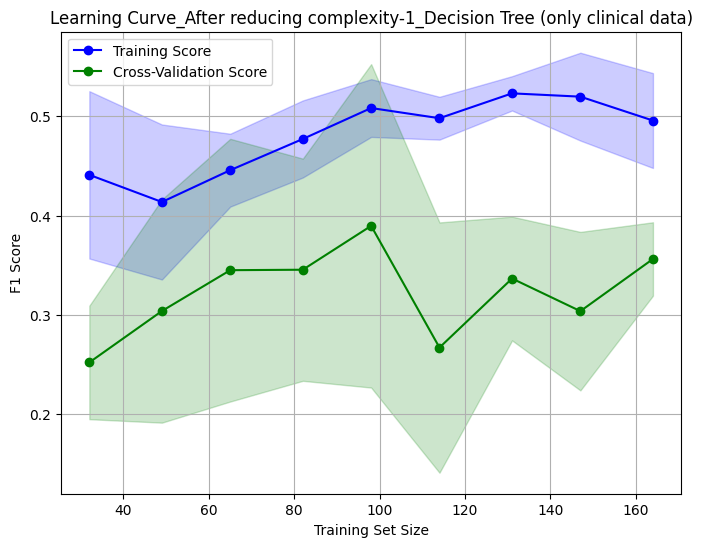

In [78]:
from sklearn.model_selection import learning_curve, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the range of training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=cv, scoring='f1', train_sizes=train_sizes, n_jobs=-1
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", color="green", marker="o")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="green")
plt.title("Learning Curve_After reducing complexity-1_Decision Tree (only clinical data)")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()
plt.show()

I would like to know the "Training Score" and "Cross-Validation Score".

In [39]:
from sklearn.model_selection import cross_val_score

# Training score
training_score = model.score(X_train, y_train)
print("Training Score:", training_score)

# Cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Training Score: 0.775609756097561
Cross-Validation Scores: [0.33333333 0.35294118 0.33333333 0.33333333 0.42857143]
Mean Cross-Validation Score: 0.3563025210084033


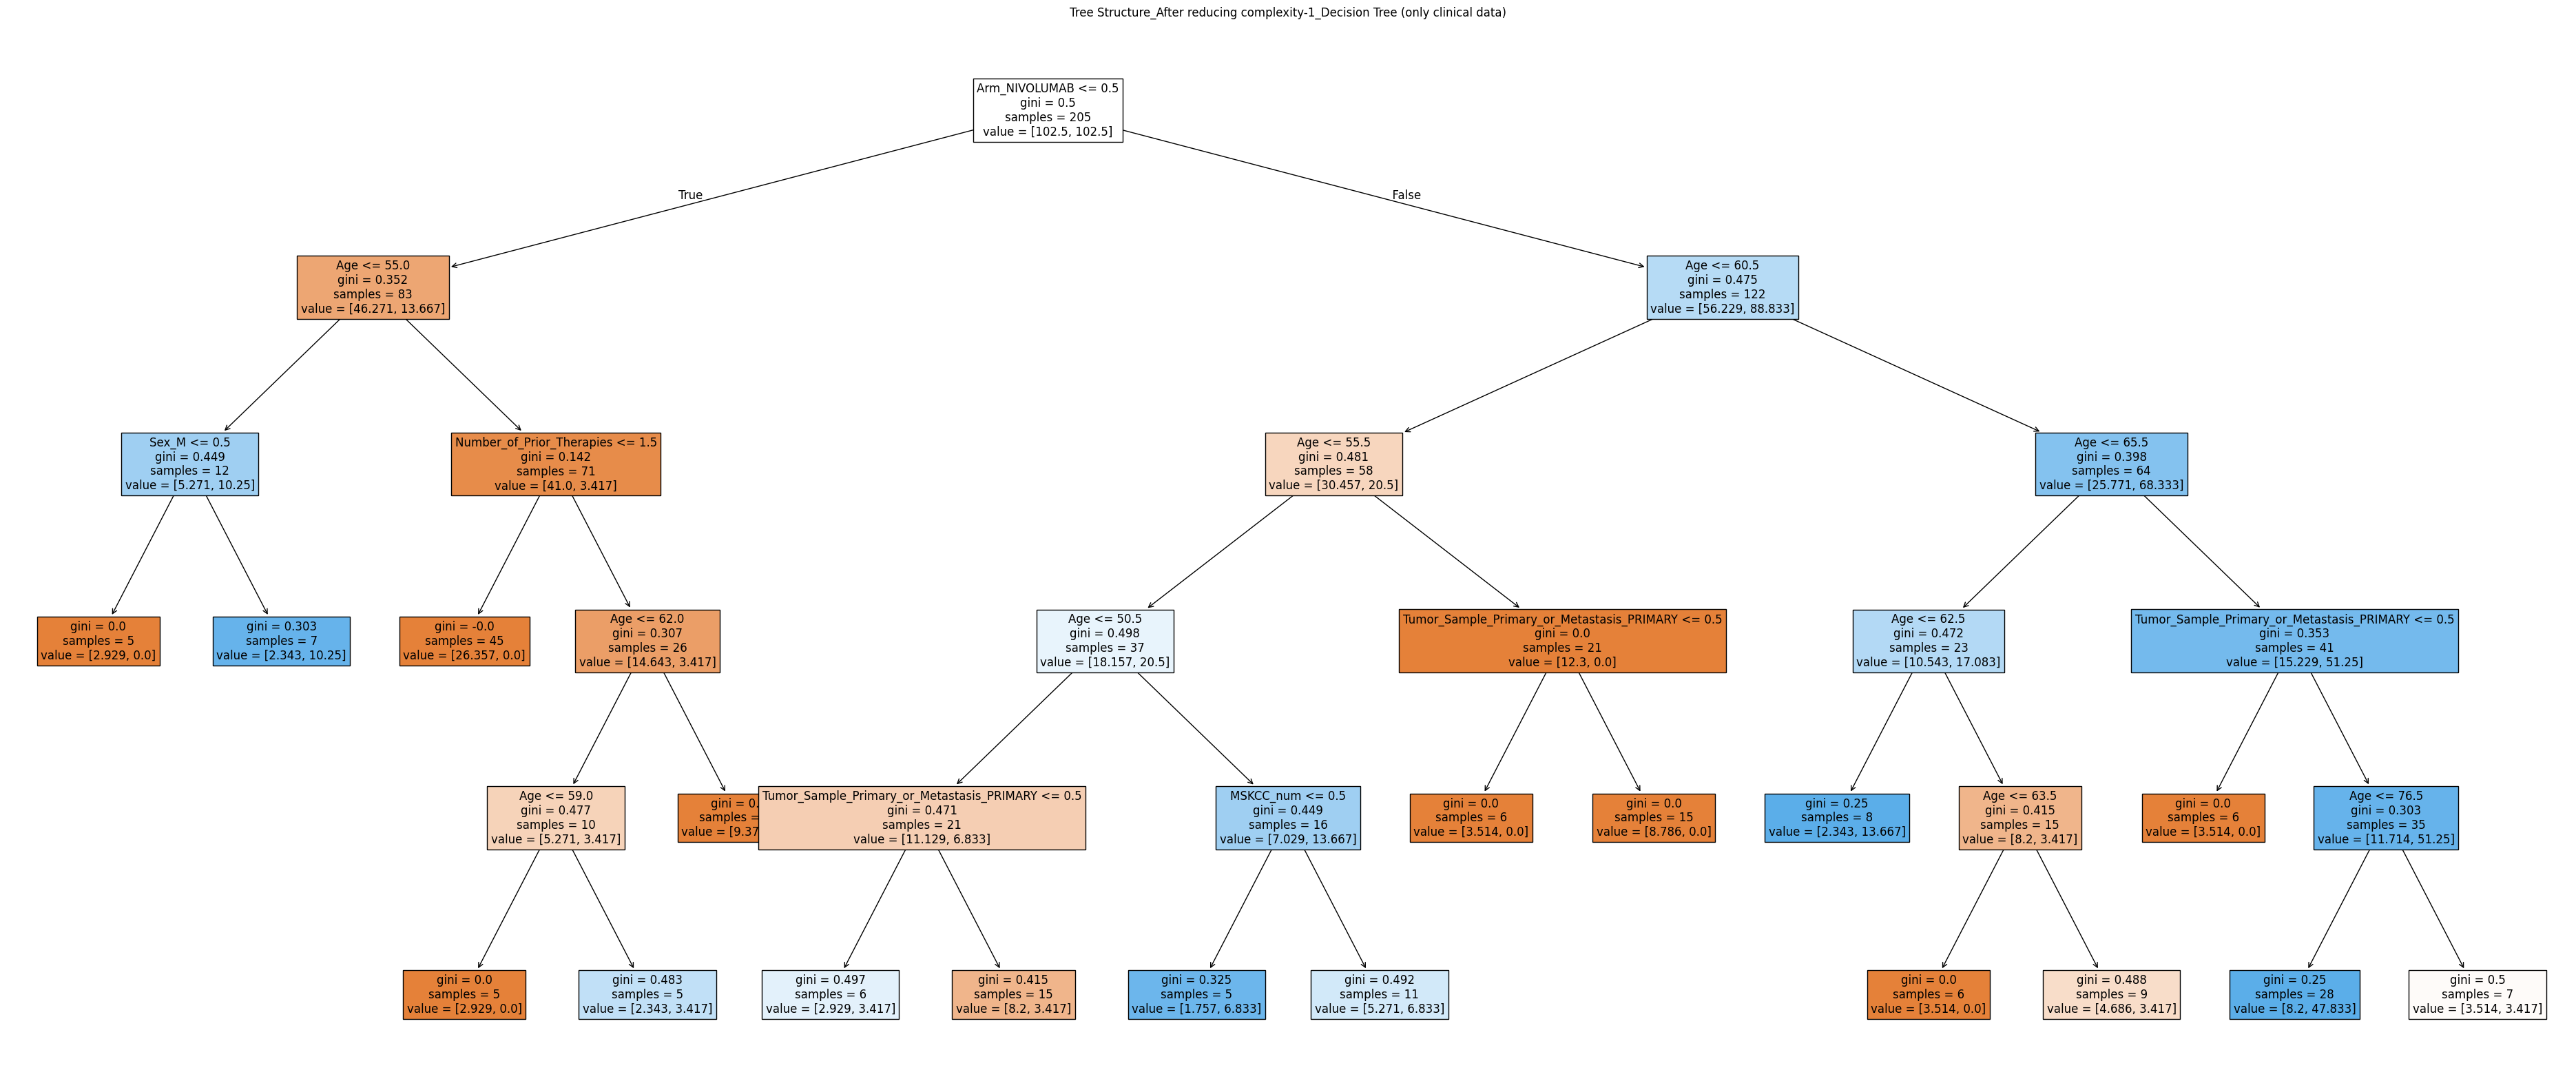

In [79]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(48, 20))  
plot_tree(model, feature_names=X.columns, filled=True, fontsize=12)
plt.title("Tree Structure_After reducing complexity-1_Decision Tree (only clinical data)")
plt.show()

Confusion matrix

Confusion Matrix:
 [[31 13]
 [ 5  3]]


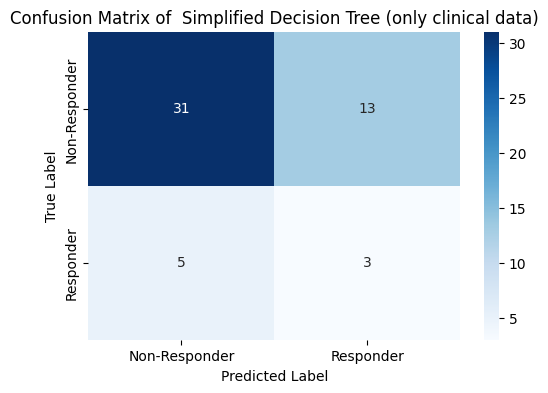

In [80]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Responder", "Responder"], yticklabels=["Non-Responder", "Responder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of  Simplified Decision Tree (only clinical data)")
plt.show()

Cross-Validated of confusion_matrix

Cross-Validated Confusion Matrix (on training set):
 [[102  73]
 [ 11  19]]


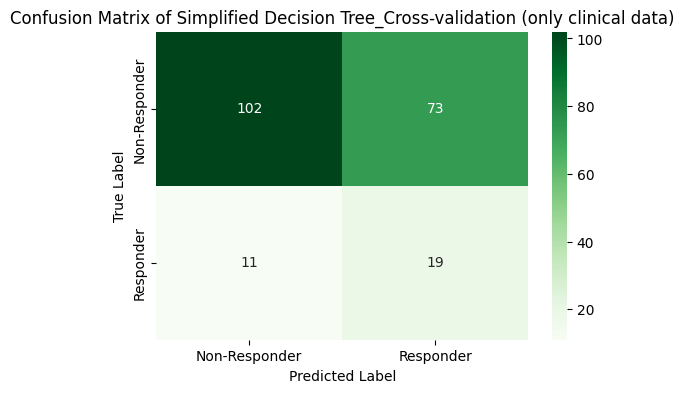

In [81]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_cv_pred = cross_val_predict(model, X_train, y_train, cv=5)


cm_cv = confusion_matrix(y_train, y_train_cv_pred)
print("Cross-Validated Confusion Matrix (on training set):\n", cm_cv)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_cv, annot=True, fmt="d", cmap="Greens", 
            xticklabels=["Non-Responder", "Responder"], 
            yticklabels=["Non-Responder", "Responder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Simplified Decision Tree_Cross-validation (only clinical data)")
plt.show()

The important feature after reducing complexity:

In [82]:
# Extract feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(10))  # Display top 10 important features

                                      Feature  Importance
3                                         Age    0.592970
4                               Arm_NIVOLUMAB    0.233092
5  Tumor_Sample_Primary_or_Metastasis_PRIMARY    0.091145
6                                       Sex_M    0.058557
2                   Number_of_Prior_Therapies    0.014269
7                                   MSKCC_num    0.009968
0                                        Sarc    0.000000
1                                        Rhab    0.000000


### I didn't use below data in the report.

#### But I think it still not good enough, so I tried another parameters

##### 2nd reducing complexity

max_depth=7, <br>
min_samples_split=2, <br>
min_samples_leaf=5, <br>
max_features=5

In [33]:

# 1. Split the dataset into training and testing sets
X = data.drop(columns=["ORR", "ORR_binary", "MSKCC"])  
# Remove target variables ("ORR", "ORR_binary"), drop 'data_nivolumab' column from "Arm", and "MSKCC"
y = data["ORR_binary"]  # Define target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)
## 20% for test, 80% for train
### random_state=42:  is used to set a fixed random seed, 
# ### ensuring that the results remain consistent across different runs of the code.


# 2. Create a Decision Tree model (use class_weight="balanced" to handle class imbalance)
model = DecisionTreeClassifier(class_weight="balanced",
                                max_depth=7,
                                min_samples_split=2,
                                min_samples_leaf=5, 
                                max_features=5,                   
                                random_state=42)
## class_weight="balanced": allow Decision Tree to adjust data balance automatically
### if without this setting, the model may only learn 0, and ignore 1

# 3. Train the model
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)
## use X_test to predict y
## y_pred contains 0 and 1
### model.predict() creates an array, there are 0 or 1
### The length of y_pred is equal to the number of samples in X_test, 
# ### representing the modeil's predicted values for each test sample.

# 5. Evaluate the model (using Accuracy, Precision, Recall, and F1-score)
print("Accuracy of test set:", accuracy_score(y_test, y_pred))
print("Precision of test set:", precision_score(y_test, y_pred))
print("Recall of test set:", recall_score(y_test, y_pred))
print("F1-score of test set:", f1_score(y_test, y_pred))


Accuracy of test set: 0.6346153846153846
Precision of test set: 0.17647058823529413
Recall of test set: 0.375
F1-score of test set: 0.24


In [34]:

print("Decision Tree depth:", model.get_depth())
print("Number of leaves:", model.get_n_leaves())

Decision Tree depth: 7
Number of leaves: 23


In [35]:

y_pred_train = model.predict(X_train)
# 5. Evaluate the model (using Accuracy, Precision, Recall, and F1-score)
print("Accuracy of train set:", accuracy_score(y_train, y_pred_train))
print("Precision of train set:", precision_score(y_train, y_pred_train))
print("Recall of train set:", recall_score(y_train, y_pred_train))
print("F1-score of train set:", f1_score(y_train, y_pred_train))

Accuracy of train set: 0.775609756097561
Precision of train set: 0.3888888888888889
Recall of train set: 0.9333333333333333
F1-score of train set: 0.5490196078431373


Create leaning curve

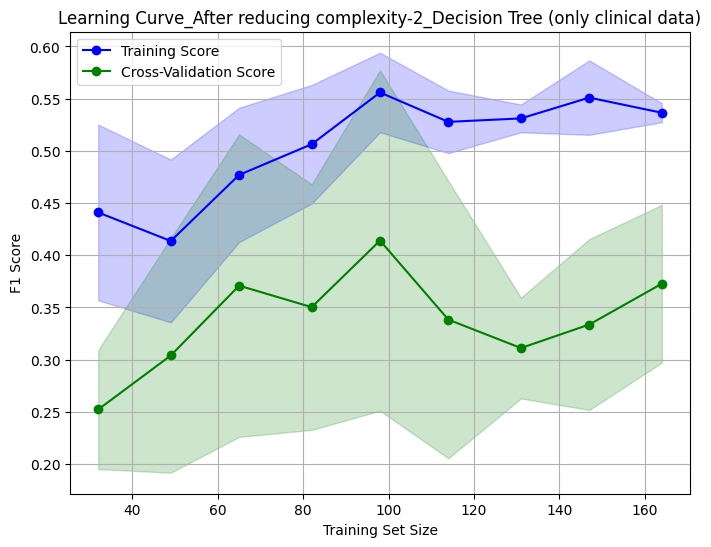

In [36]:
from sklearn.model_selection import learning_curve, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the range of training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=cv, scoring='f1', train_sizes=train_sizes, n_jobs=-1
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", color="green", marker="o")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="green")
plt.title("Learning Curve_After reducing complexity-2_Decision Tree (only clinical data)")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()
plt.show()

I would like to know the "Training Score" and "Cross-Validation Score".

In [37]:
from sklearn.model_selection import cross_val_score

# Training score
training_score = model.score(X_train, y_train)
print("Training Score:", training_score)

# Cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Training Score: 0.775609756097561
Cross-Validation Scores: [0.33333333 0.28571429 0.44444444 0.32       0.48      ]
Mean Cross-Validation Score: 0.3726984126984127


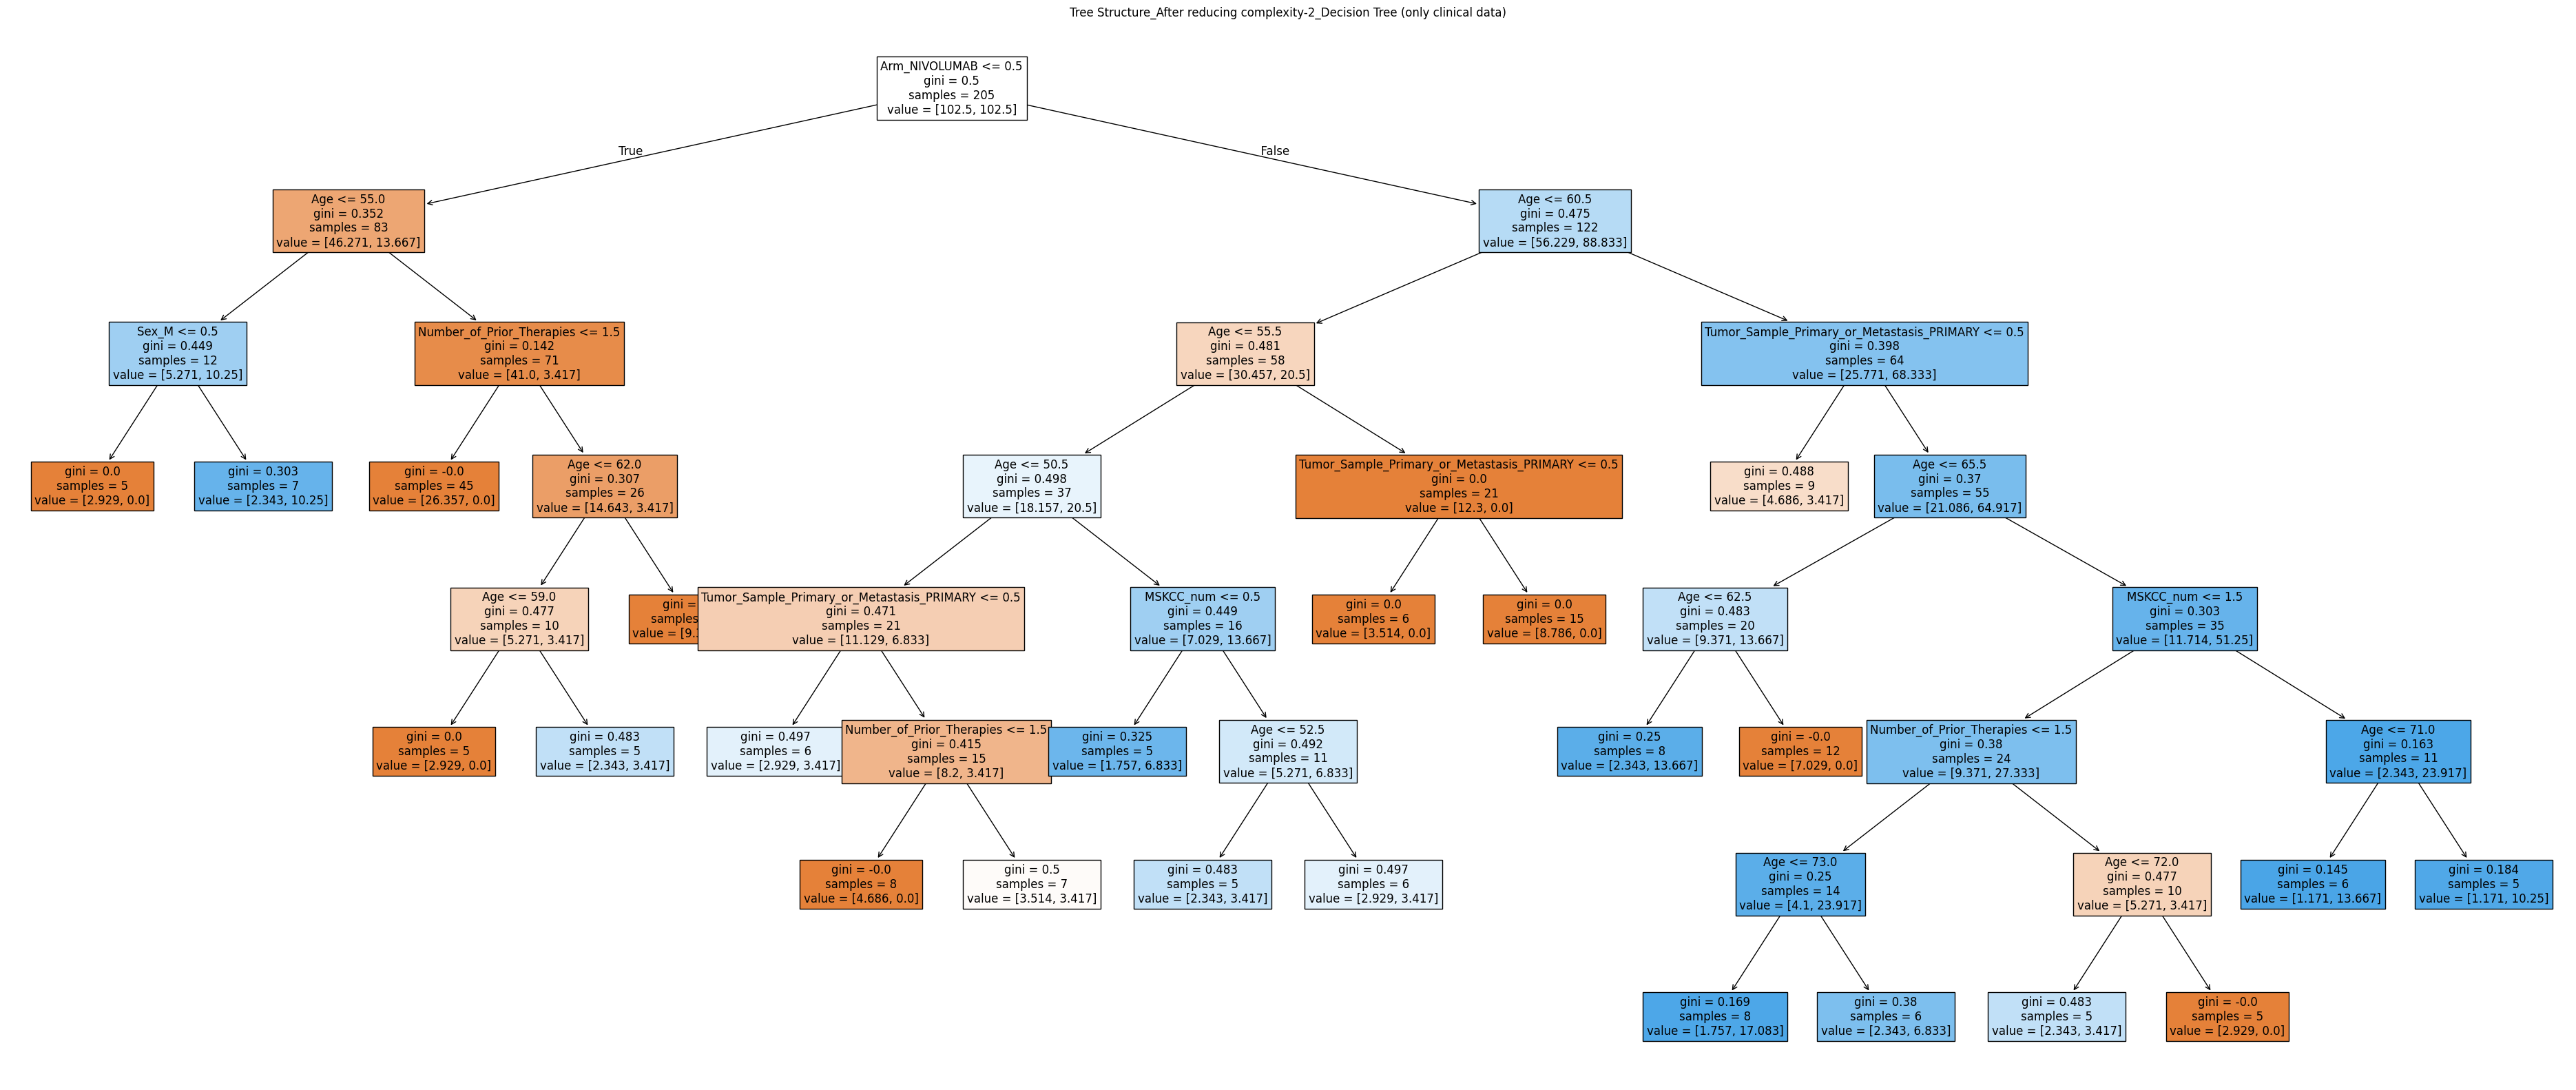

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(48, 20))  
plot_tree(model, feature_names=X.columns, filled=True, fontsize=12)
plt.title("Tree Structure_After reducing complexity-2_Decision Tree (only clinical data)")
plt.show()

Confusion matrix

Confusion Matrix:
 [[30 14]
 [ 5  3]]


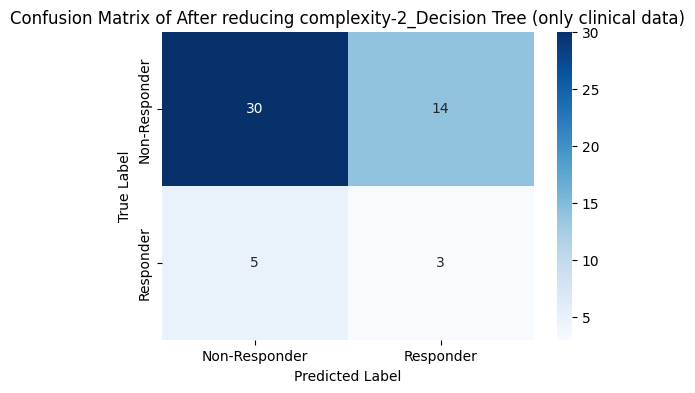

In [39]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Responder", "Responder"], yticklabels=["Non-Responder", "Responder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of After reducing complexity-2_Decision Tree (only clinical data)")
plt.show()

The important feature after reducing complexity:

In [40]:
# Extract feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(10))  # Display top 10 important features

                                      Feature  Importance
3                                         Age    0.590225
4                               Arm_NIVOLUMAB    0.212805
2                   Number_of_Prior_Therapies    0.083838
6                                       Sex_M    0.053460
5  Tumor_Sample_Primary_or_Metastasis_PRIMARY    0.036229
7                                   MSKCC_num    0.023444
0                                        Sarc    0.000000
1                                        Rhab    0.000000


##### 3rd reducing complexity

max_depth=10, <br> min_samples_split=5,<br> min_samples_leaf=5,<br> max_features=5

In [41]:

# 1. Split the dataset into training and testing sets
X = data.drop(columns=["ORR", "ORR_binary", "MSKCC"])  
# Remove target variables ("ORR", "ORR_binary"), drop 'data_nivolumab' column from "Arm", and "MSKCC"
y = data["ORR_binary"]  # Define target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)
## 20% for test, 80% for train
### random_state=42:  is used to set a fixed random seed, 
# ### ensuring that the results remain consistent across different runs of the code.


# 2. Create a Decision Tree model (use class_weight="balanced" to handle class imbalance)
model = DecisionTreeClassifier(class_weight="balanced",
                                max_depth=10,
                                min_samples_split=5,
                                min_samples_leaf=5, 
                                max_features=5,                   
                                random_state=42)
## class_weight="balanced": allow Decision Tree to adjust data balance automatically
### if without this setting, the model may only learn 0, and ignore 1

# 3. Train the model
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)
## use X_test to predict y
## y_pred contains 0 and 1
### model.predict() creates an array, there are 0 or 1
### The length of y_pred is equal to the number of samples in X_test, 
# ### representing the modeil's predicted values for each test sample.

# 5. Evaluate the model (using Accuracy, Precision, Recall, and F1-score)
print("Accuracy of test set:", accuracy_score(y_test, y_pred))
print("Precision of test set:", precision_score(y_test, y_pred))
print("Recall of test set:", recall_score(y_test, y_pred))
print("F1-score of test set:", f1_score(y_test, y_pred))


Accuracy of test set: 0.6346153846153846
Precision of test set: 0.17647058823529413
Recall of test set: 0.375
F1-score of test set: 0.24


In [42]:

print("Decision Tree depth:", model.get_depth())
print("Number of leaves:", model.get_n_leaves())

Decision Tree depth: 7
Number of leaves: 23


In [43]:

y_pred_train = model.predict(X_train)
# 5. Evaluate the model (using Accuracy, Precision, Recall, and F1-score)
print("Accuracy of train set:", accuracy_score(y_train, y_pred_train))
print("Precision of train set:", precision_score(y_train, y_pred_train))
print("Recall of train set:", recall_score(y_train, y_pred_train))
print("F1-score of train set:", f1_score(y_train, y_pred_train))

Accuracy of train set: 0.775609756097561
Precision of train set: 0.3888888888888889
Recall of train set: 0.9333333333333333
F1-score of train set: 0.5490196078431373


Create leaning curve

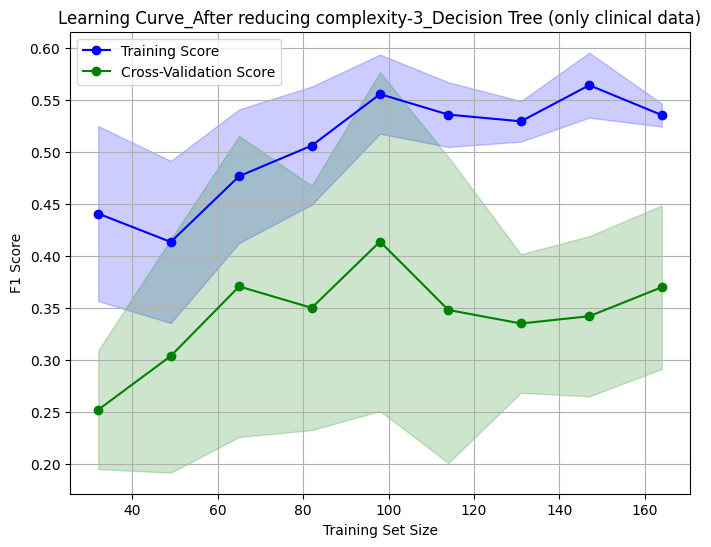

In [44]:
from sklearn.model_selection import learning_curve, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the range of training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=cv, scoring='f1', train_sizes=train_sizes, n_jobs=-1
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", color="green", marker="o")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="green")
plt.title("Learning Curve_After reducing complexity-3_Decision Tree (only clinical data)")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()
plt.show()

I would like to know the "Training Score" and "Cross-Validation Score".

In [45]:
from sklearn.model_selection import cross_val_score

# Training score
training_score = model.score(X_train, y_train)
print("Training Score:", training_score)

# Cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Training Score: 0.775609756097561
Cross-Validation Scores: [0.33333333 0.27272727 0.44444444 0.32       0.48      ]
Mean Cross-Validation Score: 0.3701010101010101


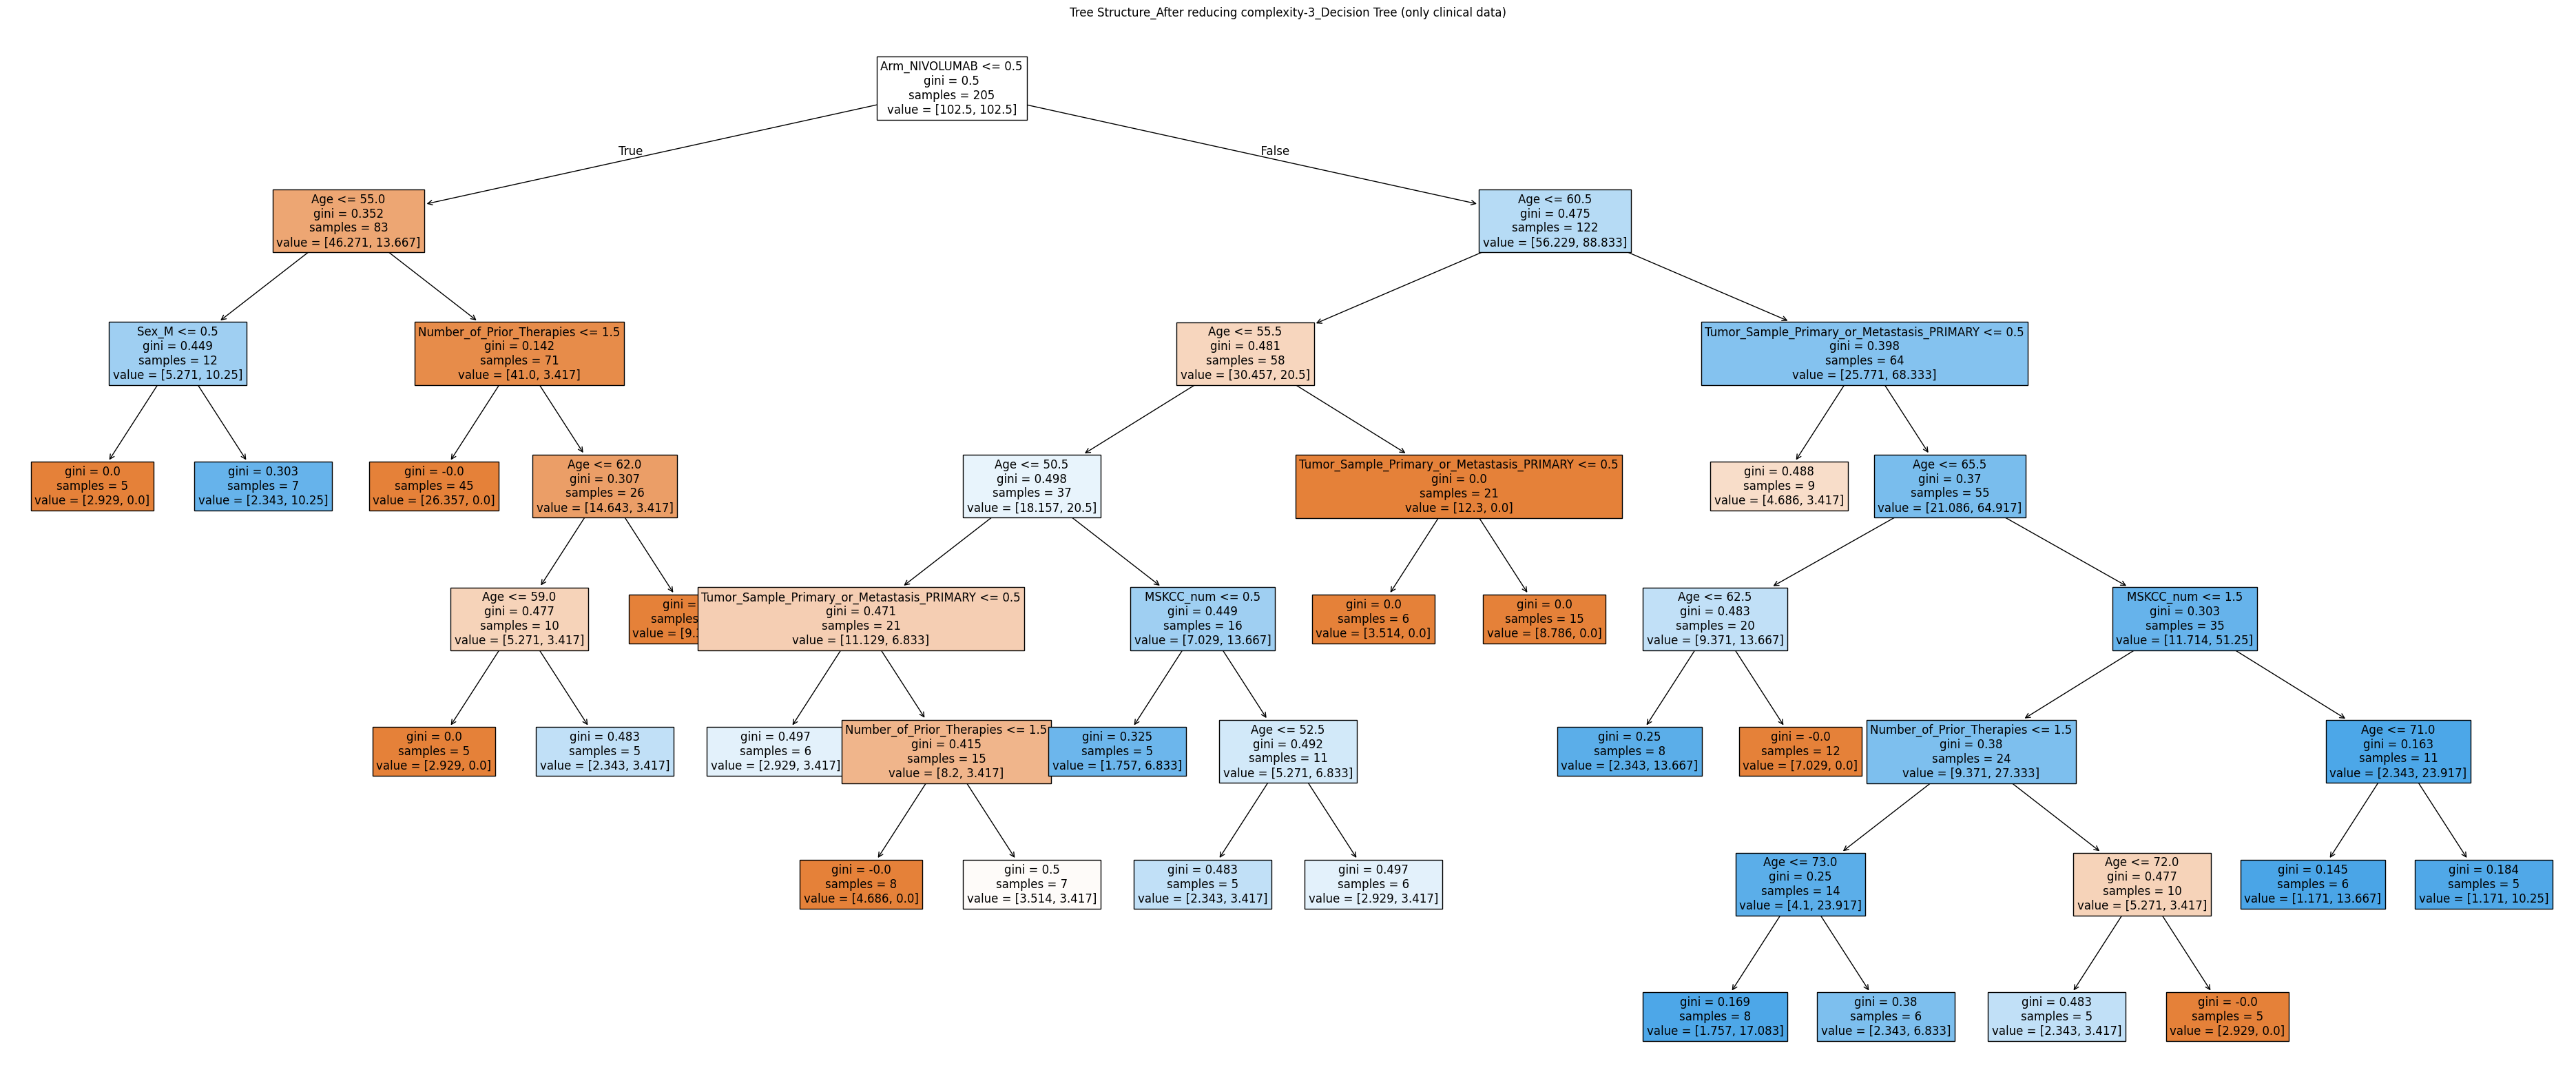

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(48, 20))  
plot_tree(model, feature_names=X.columns, filled=True, fontsize=12)
plt.title("Tree Structure_After reducing complexity-3_Decision Tree (only clinical data)")
plt.show()

Confusion matrix

Confusion Matrix:
 [[30 14]
 [ 5  3]]


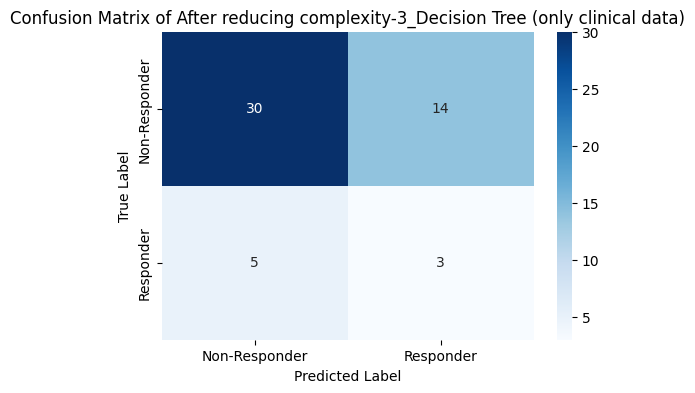

In [47]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Responder", "Responder"], yticklabels=["Non-Responder", "Responder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of After reducing complexity-3_Decision Tree (only clinical data)")
plt.show()

The important feature after reducing complexity:

In [49]:
# Extract feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(10))  # Display top 10 important features

                                      Feature  Importance
3                                         Age    0.590225
4                               Arm_NIVOLUMAB    0.212805
2                   Number_of_Prior_Therapies    0.083838
6                                       Sex_M    0.053460
5  Tumor_Sample_Primary_or_Metastasis_PRIMARY    0.036229
7                                   MSKCC_num    0.023444
0                                        Sarc    0.000000
1                                        Rhab    0.000000
